In [55]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [4]:
# Look at the games.csv data file
games = pd.read_csv('data/games.csv')

In [6]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [8]:
games.columns

Index(['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern',
       'homeTeamAbbr', 'visitorTeamAbbr'],
      dtype='object')

In [9]:
# Not much significant information stored in the games.csv file

In [12]:
# Look at the players.csv data file
players = pd.read_csv('data/players.csv')

In [14]:
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [15]:
players.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'Position',
       'displayName'],
      dtype='object')

In [16]:
# Basic information about the player is included, more to have a unique player ID than anything else.
# Weight and height could be useufl.

In [17]:
# Look at the plays data
plays = pd.read_csv('data/plays.csv')

In [18]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [19]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'specialTeamsPlayType', 'specialTeamsResult',
       'kickerId', 'returnerId', 'kickBlockerId', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers',
       'penaltyYards', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'kickLength', 'kickReturnYardage', 'playResult',
       'absoluteYardlineNumber'],
      dtype='object')

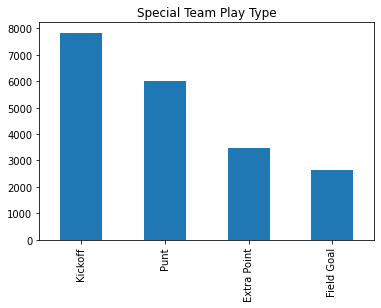

In [85]:
# All of the special teams plays available
playTypes = plays.specialTeamsPlayType.unique()
playTypes
axes = plays.specialTeamsPlayType.value_counts().plot.bar()
axes.set_title('Special Team Play Type')
plt.show()

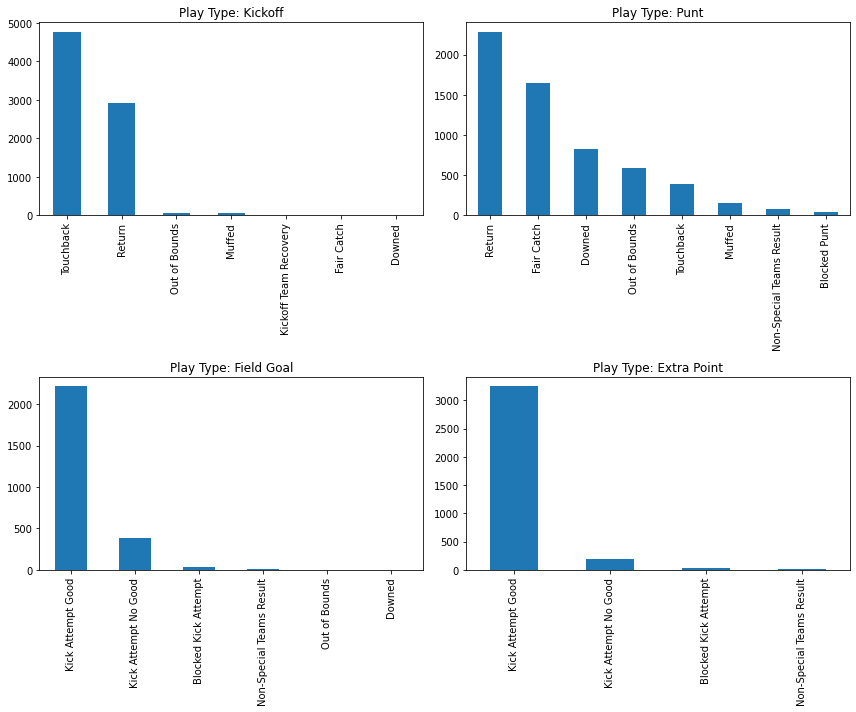

In [70]:
# All of the potential outcomes from the each play type and plot
fig, axes = plt.subplots(nrows=2, ncols=2)
outcomes = []
for playType in playTypes:
    playOutcomes = plays.loc[plays.specialTeamsPlayType==playType, ['specialTeamsResult']].specialTeamsResult.value_counts()
    outcomes.append(playOutcomes)
    
outcomes[0].plot.bar(ax=axes[0, 0])
outcomes[1].plot.bar(ax=axes[0, 1])
outcomes[2].plot.bar(ax=axes[1, 0])
outcomes[3].plot.bar(ax=axes[1, 1])

axes[0, 0].set_title("Play Type: " + playTypes[0])
axes[0, 1].set_title("Play Type: " + playTypes[1])
axes[1, 0].set_title("Play Type: " + playTypes[2])
axes[1, 1].set_title("Play Type: " + playTypes[3])
fig.set_size_inches(12.0, 10.0)
fig.tight_layout()
plt.show()

In [72]:
# Look at scouting data
scouting = pd.read_csv('data/PFFScoutingData.csv')

In [73]:
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [75]:
scouting.columns

Index(['gameId', 'playId', 'snapDetail', 'snapTime', 'operationTime',
       'hangTime', 'kickType', 'kickDirectionIntended', 'kickDirectionActual',
       'returnDirectionIntended', 'returnDirectionActual', 'missedTackler',
       'assistTackler', 'tackler', 'kickoffReturnFormation', 'gunners',
       'puntRushers', 'specialTeamsSafeties', 'vises', 'kickContactType'],
      dtype='object')

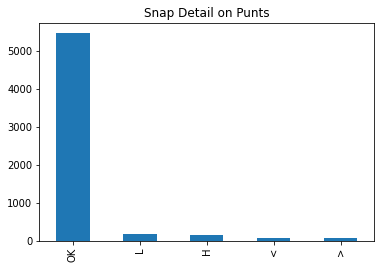

In [87]:
axes = scouting.snapDetail.dropna().value_counts().plot.bar()
axes.set_title('Snap Detail on Punts')
plt.show()

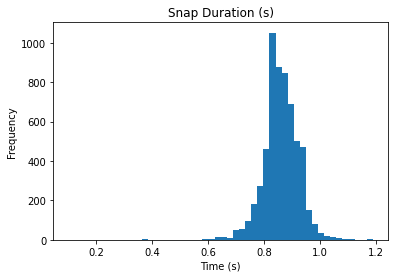

In [107]:
axes = scouting.snapTime.dropna().plot.hist(bins=50)
axes.set_title('Snap Duration (s)')
axes.set_xlabel('Time (s)')
plt.show()

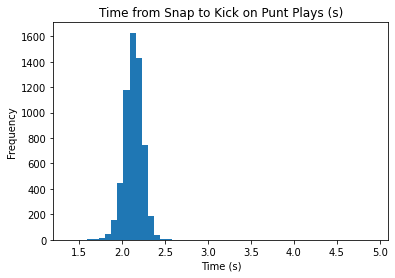

In [106]:
axes = scouting.operationTime.dropna().plot.hist(bins=50)
axes.set_title('Time from Snap to Kick on Punt Plays (s)')
axes.set_xlabel('Time (s)')
plt.show()

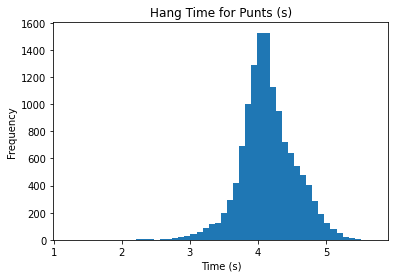

In [113]:
### Could look at how the hang time correlates with specific punters/teams
axes = scouting.hangTime.dropna().plot.hist(bins=50)
axes.set_title('Hang Time for Punts (s)')
axes.set_xlabel('Time (s)')
plt.show()

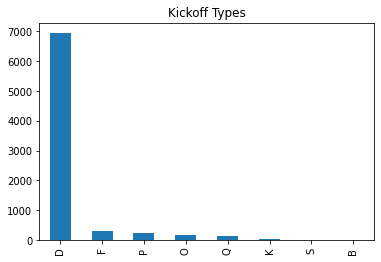

In [116]:
axes = scouting.kickType.dropna().value_counts().drop(['R', 'N', 'A']).plot.bar()
axes.set_title('Kickoff Types')
plt.show()

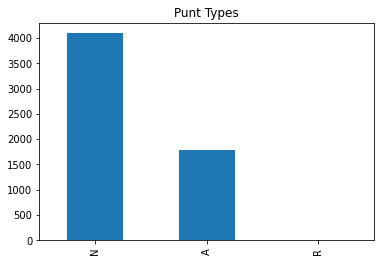

In [118]:
axes = scouting.kickType.dropna().value_counts().drop(['D', 'F', 'P', 'O', 'Q', 'K', 'S', 'B']).plot.bar()
axes.set_title('Punt Types')
plt.show()